## Model Development

Mass balances for a fed-batch bioreactor are given by

$$\begin{align*}
\frac{d(XV)}{dt} & = V r_g(X,S) \\
\frac{d(PV)}{dt} & = V r_P(X,S) \\
\frac{d(SV)}{dt} & = F S_f - \frac{1}{Y_{X/S}}V r_g(X,S)
\end{align*}$$

where $X$ is cell concentration, $P$ is product concentration, and $S$ is substrate concentration, all given in units of grams/liter. The reactor is fed with fresh substrate at concentration $S_f$ and flowrate $F(t)$ in liters per hour. The volume (in liters) is therefore changing 

$$\frac{dV}{dt} = F(t)$$

Rate $r_g(X,S)$ is the production of fresh cell biomass in units of grams/liter/hr. The cell specific growth is expressed as

$$r_g(X,S) = \mu(S)X$$

where $\mu(S)$ is the cell specific growth rate. In the Monod model, the specific growth rate is a function of substrate concentration given by

$$\mu(S) = \mu_{max}\frac{S}{K_S + S}$$

where $\mu_{max}$ is the maximum specific growth rate, and $K_S$ is the half saturation constant which is the value of $S$ for which $\mu = \frac{1}{2}\mu_{max}$.

For this model, the product is assumed to be a by-product of cell growth

$$r_P(X,S) = Y_{P/X}r_g(X,S)$$

where $Y_{P/X}$ is the product yield coefficient defined as

$$Y_{P/X} = \frac{\mbox{mass of product formed}}{\mbox{mass of new cells formed}}$$

The model further assumes that substrate is consumed is proportion to the mass of new cells formed where $Y_{X/S}$ is the yield coefficient for new cells

$$Y_{P/X} = \frac{\mbox{mass of new cells formed}}{\mbox{mass of substrate consumed}}$$

### Dilution Effect

One aspect of the fed-batch model is that volume is not constant, therefore the cell, product, and substrate concentrations are subject to a dilution effect.  Mathematically, the chain rule of differential calculus provides a means to recast the state of model in terms of the intensive concentration variables $X$, $P$, and $S$, and extensive volume $V$.

$$\begin{align*}
\frac{d(XV)}{dt} & = V\frac{dX}{dt} + X\frac{dV}{dt} = V\frac{dX}{dt} + F(t)X \\
\frac{d(PV)}{dt} & = V\frac{dP}{dt} + P\frac{dV}{dt} = V\frac{dP}{dt} + F(t)P \\
\frac{d(SV)}{dt} & = V\frac{dS}{dt} + S\frac{dV}{dt} = V\frac{dS}{dt} + F(t)S
\end{align*}$$

Rearranging and substituting into the mass balances gives

$$\begin{align*}
\frac{dX}{dt} & = - \frac{F(t)}{V}X + r_g(X,S)  \\
\frac{dP}{dt} & = - \frac{F(t)}{V}P + r_P(X,S) \\
\frac{dS}{dt} & = \frac{F(t)}{V}(S_f - S) - \frac{1}{Y_{X/S}}r_g(X,S) \\
\frac{dV}{dt} & = F(t)
\end{align*}$$

##  Python Implementation

In [15]:
 %matplotlib inline
 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
 
 
# parameter values
 
mumax = 0.6      # 1/hour ค่าจำเพาะการโต
Ks = 0.8         # g/liter ค่าจำเพาะการกิน
Yxs = 0.6         # g/g ค่าการเปลี่ยนซับสเตรท 1 g เป็น เซลล์
Ypx = 0.1        # g/g ค่าการเปลี่ยนเซลล์ 1 g เป็นโปรตีน
Sf = 300.0         # g/liter ความเข้มข้นน้ำตาลที่ใช้ feed
muset = 0.5  #1/hour
Xi = 1        #g/Liter
Vi = 3        #Liter
W = Sf*Yxs    
 
 
# inlet flowrate
def F(t):
    return muset*Xi*Vi*math.e**(muset*t)/W
 
# reaction rates
def mu(S):
    return mumax*S/(Ks + S) 
def Rg(X,S):
    return mu(S)*X
    
def Rp(X,S):
    return Ypx*Rg(X,S) 
# differential equations
 
def xdot(x,t):
    X,P,S,V = x
    dX = -F(t)*X/V + Rg(X,S)
    dP = -F(t)*P/V + Rp(X,S)
    dS = F(t)*(Sf-S)/V - Rg(X,S)/Yxs
    dV = F(t)
    return [dX,dP,dS,dV]

## Simulation

array([[  0.        ,   1.        ],
       [  0.40816327,   1.26390047],
       [  0.81632653,   1.59691454],
       [  1.2244898 ,   2.01683387],
       [  1.63265306,   2.54584891],
       [  2.04081633,   3.21152769],
       [  2.44897959,   4.04794294],
       [  2.85714286,   5.09691816],
       [  3.26530612,   6.40930815],
       [  3.67346939,   8.04611628],
       [  4.08163265,  10.07900927],
       [  4.48979592,  12.58922843],
       [  4.89795918,  15.66238411],
       [  5.30612245,  19.37178231],
       [  5.71428571,  23.72369681],
       [  6.12244898,  28.45535868],
       [  6.53061224,  32.76077798],
       [  6.93877551,  36.87459588],
       [  7.34693878,  41.51101555],
       [  7.75510204,  46.79357796],
       [  8.16326531,  52.74096011],
       [  8.57142857,  59.33935695],
       [  8.97959184,  66.54143845],
       [  9.3877551 ,  74.2635798 ],
       [  9.79591837,  82.38672666],
       [ 10.20408163,  90.76190836],
       [ 10.6122449 ,  99.22024845],
 

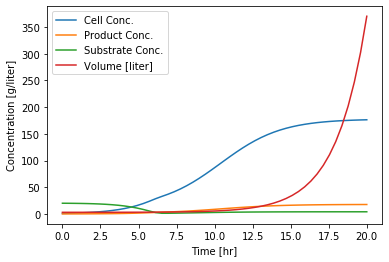

In [16]:
IC = [1, 0.0, 20, 3.0]
 
t = np.linspace(0,20)
sol = odeint(xdot,IC,t)
X,P,S,V= sol.transpose()
 
plt.plot(t,X)
plt.plot(t,P)
plt.plot(t,S)
plt.plot(t,V)
 
plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Product Conc.',
            'Substrate Conc.',
            'Volume [liter]'])
ax = plt.gca()  # get axis handle
line = ax.lines[0] # 0;Cell, 1;Product, 2;Substrate, 3;Volume
line.get_xdata()
line.get_ydata()
line.get_xydata()

In [17]:
print(sol)

[[1.00000000e+00 0.00000000e+00 2.00000000e+01 3.00000000e+00]
 [1.26390047e+00 2.65156655e-02 1.99098049e+01 3.00377330e+00]
 [1.59691454e+00 5.99707014e-02 1.97823808e+01 3.00840088e+00]
 [2.01683387e+00 1.02150400e-01 1.96051297e+01 3.01407613e+00]
 [2.54584891e+00 1.55281216e-01 1.93616908e+01 3.02103624e+00]
 [3.21152769e+00 2.22128885e-01 1.90309746e+01 3.02957212e+00]
 [4.04794294e+00 3.06111398e-01 1.85860346e+01 3.04004050e+00]
 [5.09691816e+00 4.11423915e-01 1.79928131e+01 3.05287890e+00]
 [6.40930815e+00 5.43167123e-01 1.72088780e+01 3.06862389e+00]
 [8.04611628e+00 7.07459277e-01 1.61824309e+01 3.08793353e+00]
 [1.00790093e+01 9.11487966e-01 1.48522423e+01 3.11161483e+00]
 [1.25892284e+01 1.16340144e+00 1.31500603e+01 3.14065754e+00]
 [1.56623841e+01 1.47178816e+00 1.10095075e+01 3.17627547e+00]
 [1.93717823e+01 1.84400929e+00 8.39348129e+00 3.21995723e+00]
 [2.37236968e+01 2.28072545e+00 5.38406146e+00 3.27352847e+00]
 [2.84553587e+01 2.75569475e+00 2.51661495e+00 3.339228

In [18]:
print(t)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [24]:
import pandas as pd
df= pd.DataFrame(sol, index = t, columns = ['Cell', 'Product', 'Substrate', 'Volume'])
print (df)

                 Cell    Product  Substrate      Volume
0.000000     1.000000   0.000000  20.000000    3.000000
0.408163     1.263900   0.026516  19.909805    3.003773
0.816327     1.596915   0.059971  19.782381    3.008401
1.224490     2.016834   0.102150  19.605130    3.014076
1.632653     2.545849   0.155281  19.361691    3.021036
2.040816     3.211528   0.222129  19.030975    3.029572
2.448980     4.047943   0.306111  18.586035    3.040040
2.857143     5.096918   0.411424  17.992813    3.052879
3.265306     6.409308   0.543167  17.208878    3.068624
3.673469     8.046116   0.707459  16.182431    3.087934
4.081633    10.079009   0.911488  14.852242    3.111615
4.489796    12.589228   1.163401  13.150060    3.140658
4.897959    15.662384   1.471788  11.009507    3.176275
5.306122    19.371782   1.844009   8.393481    3.219957
5.714286    23.723697   2.280725   5.384061    3.273528
6.122449    28.455359   2.755695   2.516615    3.339228
6.530612    32.760778   3.188353   1.232528    3

                 Cell    Product  Substrate      Volume
0.000000     1.000000   0.000000  20.000000    3.000000
0.408163     1.263900   0.026516  19.909805    3.003773
0.816327     1.596915   0.059971  19.782381    3.008401
1.224490     2.016834   0.102150  19.605130    3.014076
1.632653     2.545849   0.155281  19.361691    3.021036
2.040816     3.211528   0.222129  19.030975    3.029572
2.448980     4.047943   0.306111  18.586035    3.040040
2.857143     5.096918   0.411424  17.992813    3.052879
3.265306     6.409308   0.543167  17.208878    3.068624
3.673469     8.046116   0.707459  16.182431    3.087934
4.081633    10.079009   0.911488  14.852242    3.111615
4.489796    12.589228   1.163401  13.150060    3.140658
4.897959    15.662384   1.471788  11.009507    3.176275
5.306122    19.371782   1.844009   8.393481    3.219957
5.714286    23.723697   2.280725   5.384061    3.273528
6.122449    28.455359   2.755695   2.516615    3.339228
6.530612    32.760778   3.188353   1.232528    3